# Oemer - End-to-End OMR

Given a music score image, which can also be phone taken, this tool will parse and generate the result file in MusicXML format, which can be further edited easily with other tools such as Musescore.

In [1]:
#@title Setup

!add-apt-repository --yes ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get --yes install musescore3 libmagic-dev cudnn9-cuda-12

!pip install git+https://github.com/BreezeWhite/oemer

%load_ext autoreload
%autoreload 2

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

Saving De música ligera_5.png to De música ligera_5.png
Saving De música ligera_4.png to De música ligera_4.png
Saving De música ligera_3.png to De música ligera_3.png
Saving De música ligera_2.png to De música ligera_2.png
Saving De música ligera_1.png to De música ligera_1.png


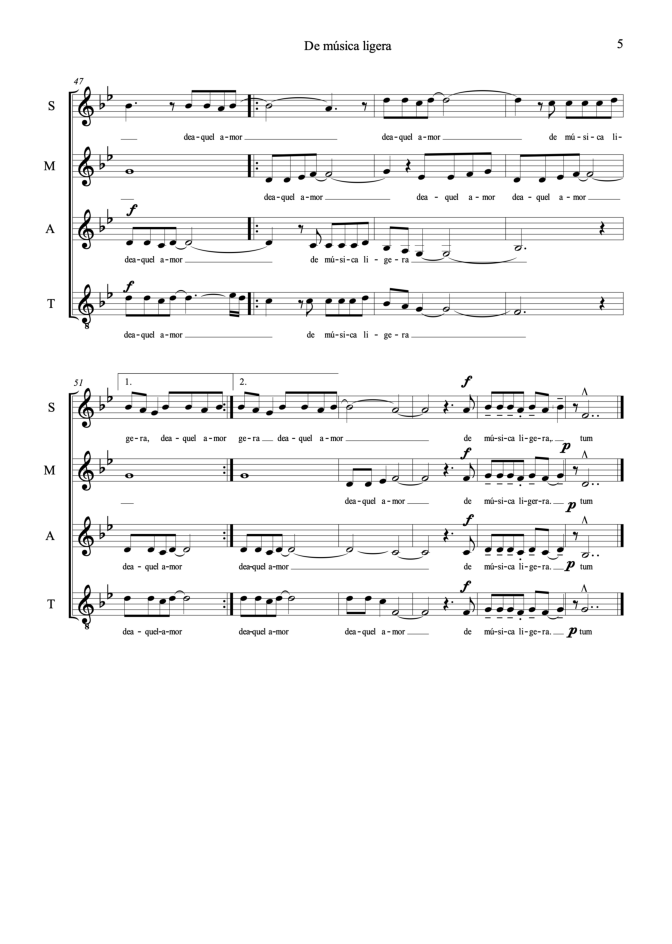

In [2]:
#@title Upload Image

%matplotlib inline

from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

ff = files.upload()
img_path = list(ff.keys())[0]
basename = img_path.replace(".jpg", "").replace(".png", "")

os.environ['img_path'] = img_path
os.environ['basename'] = basename

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

In [ ]:
#@title Run Recoginition

%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen

import IPython.display as dsp

!oemer "$img_path"

!musescore3 -o "${basename}.mp3" $basename.musicxml
!musescore3 -o "${basename}.png" $basename.musicxml


img = plt.imread(f"{basename}-1.png")
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(img)
plt.show()

dsp.display(dsp.Audio(f"{basename}.mp3"))

env: DEBIAN_FRONTEND=noninteractive
env: QT_QPA_PLATFORM=offscreen
2025-03-22 18:15:36 Extracting staffline and symbols
2025-03-22 18:15:36.354756009 [W:onnxruntime:, cuda_execution_provider.cc:2557 ConvTransposeNeedFallbackToCPU] Dropping the ConvTranspose node: ConvTranspose__19277 to CPU because it requires asymmetric padding which the CUDA EP currently does not support
2025-03-22 18:15:36.354784850 [W:onnxruntime:, cuda_execution_provider.cc:2751 GetCapability] CUDA kernel not supported. Fallback to CPU execution provider for Op type: ConvTranspose node name: ConvTranspose__19277
2025-03-22 18:15:36.354793939 [W:onnxruntime:, cuda_execution_provider.cc:2557 ConvTransposeNeedFallbackToCPU] Dropping the ConvTranspose node: model/conv2d_transpose_1/conv2d_transpose to CPU because it requires asymmetric padding which the CUDA EP currently does not support
2025-03-22 18:15:36.354800421 [W:onnxruntime:, cuda_execution_provider.cc:2751 GetCapability] CUDA kernel not supported. Fallback to